# Free energy calculations

In this tutorial we will demonstrate how one can compute the free energy of solids accounting for the full anharmonicity using thermodynamic integration (TI).
For a comprehensive discussion of the subject see reference 1 and in particular the excellent article (reference 2) by Freitas *et al.*

## Introduction

### Thermodynamic integration

Consider a Hamiltonian $H(\lambda)$ that is parametrically dependent on a parameter $\lambda$.
One can show that the free energy difference between two thermodynamic states corresponding to $\lambda_i$ and $\lambda_f$ can be computed as
$$
\Delta F
= F(\lambda_f) - F(\lambda_i)
= \int_{\lambda_i}^{\lambda_f} \left < \frac{\mathrm{d}H}{\mathrm{d}\lambda} \right >_\lambda \mathrm{d}\lambda.
$$
The integral can be interpreted as the reversible work done along the path from $\lambda_i$ to $\lambda_f$,
$$
\Delta F \equiv W_{i\rightarrow f}^\mathrm{rev}.
$$
In **equilibrium TI approaches** this integral is discretized and one carries out separate simulations for each value of $\lambda$.

In practice **non-equilibrium approaches**, in which $\lambda$ is updated continuously throughout a simulation, are, however, usually (much) more efficient and we also adopt this approach here.
In this case, one computes the *irreversible* work down along a path,
$$
W_{i\rightarrow f}^\mathrm{irr}
= \int_0^{t_s} \frac{d\lambda}{dt} \left(\frac{dH}{d\lambda}\right)_{\Gamma(t)},
$$
where $\lambda=\lambda(t)$ is a function of the simulation time $t$ and $\Gamma(t)$ is the phase-space trajectory traversed during the simulation.

This basic principle can be employed in several different ways to obtain free energy differences and, given a suitable reference state with a known free energy, ultimately also *total* free energies.
Here, we consider
* the Frenkel-Ladd approach, in which the Hamiltonian is gradually switched from one Hamiltonian (e.g., an Einstein crystal) to another Hamiltonian (e.g., the system of interest) and
* the reversible scaling (RS) approach, in which one integrates the work done as thermodynamic variable (typically the temperature) changes.


### Frenkel-Ladd approach

We consider two Hamiltonians (interatomic potentials), the first one $H_A$ is the interatomic potential of interest (in this example a NEP model), and the second one $H_B$ is a reference potential for which the free energy is analytically known.
We define a mixing Hamiltonian
$$
H(\lambda) = (1 - \lambda) H_A + \lambda H_B
$$
where $\lambda$ is the mixing parameter, such that if $\lambda=0$ we recover $H_A$ and if $\lambda=1$ we obtain $H_B$.

The free energy differences between the system represented by $H_A$ and $H_B$ can be otained by integration as follows
$$
F_B - F_A
= \int_0^1 \left < \frac{\mathrm{d}H(\lambda)}{\mathrm{d}\lambda} \right >_H \mathrm{d}\lambda
= \int_0^1 \left < H_B - H_A \right >_H \mathrm{d}\lambda,
$$
where $\left < H_B - H_A \right >_H$ is the ensemble average of the energy difference between potential $B$ and $A$.

Typically it is efficient to sample the integral in the expression above via a molecular dynamics (MD) simulation, during which $\lambda$ is continously changed between 0 and 1. 
The change in $\lambda$ can be carried out in both directions, i.e., with $\lambda$ changing from $0 \to 1$ or from $1 \to 0$, which are referred to as "forward" and "backward" switching, respectively.
This type of integration typically incurs some a systematic error due to the simulation not being in equilibrium due to $\lambda$ changing continously in the simulation.
However, these systematic errors are the same but with opposite sign in forward and backward integration and hence the average over these two lead to a much more accurate free energy [2],
$$
F_\mathrm{average} = \left( F_\mathrm{forward} + F_\mathrm{backward} \right) / 2.
$$

Alternatively one can also run multiple runs with fixed values of $\lambda$, but this is typically much less efficient.

In order for the thermodynamic integration to converge and be as accurate as possible the reference Halmitonian should be chosen as "similar" to the Hamiltonian of the system of interest as possible.
This means that the phase space sampled by the reference potential at the given temperature should be as close as possible to the phase space sampled by the real potential.

A good and common choice of reference system is an **Einstein crystal**, where each atom is tethered to a reference position with a harmonic spring, i.e.,
$$
U = \sum_i k (r_i - r_i^0)^2,
$$
where $k$ is the spring constant (corresponding to a frequency $\omega_\mathrm{E}$), $r_i$ is the position of atom $i$ and $r_i^0$ is the reference position.
A good choice for the spring constant is such that the mean square displacements of the Einstein crystal is similar to that of the reference system.
Or it can be chosen such that the frequency of the Einstein solid is similar to a typical/average phonon frequency in the system.

The free energy of the Einstein crystal is given by
$$
F_\mathrm{E} = 3 N k_\mathrm{B} T \ln{\left(\frac{\hbar \omega_\mathrm{E}}{k_\mathrm{B}T} \right )}.
$$
Note that since we are running classical MD simulations we need to use the classical harmonic free energy and not the quantum variant.

There is a small correction due to the center of mass being fixed in MD simulations and thus effectivley, three degrees of freedoms are not sampled [2].
This is, however, a very small effect and usually (i) cancels out when considering free energy difference between two phases and (ii) vanishes in the thermodynamic limit, i.e., for large system sizes.

Note that if your system exhibits any kind of diffusion, an Einstein crystal will be a poor reference.

### Reversible scaling

In the reversible scaling (RS) approach each value of $\lambda$ corresponds to a different temperature, and one considers the scaled Hamiltonian
$$
H(\lambda) = \sum_i^\mathrm{atoms} \frac{\vec{p}_i^2}{2 m_i} + \lambda U(\vec{r}).
$$
In practice one carries out a simulation during which $\lambda$ varies with time.
Afterwards one calculates the irreversible work 
$$
W_{1\rightarrow\lambda_f}^\mathrm{irr}
= \int_0^{t_s} dt \frac{d\lambda}{dt} U(\Gamma(t))
$$
and then obtains the free energy as a (continuous) function of temperature via
$$
F_0(T) = \frac{F(T_0)}{\lambda}
+ \frac{3}{2} N k_\mathrm{B} T_0 \frac{\ln\lambda}{\lambda}
+ \frac{1}{2\lambda} \left[
W_{1\rightarrow\lambda}^\mathrm{irr} - W_{\lambda\rightarrow 1}^\mathrm{irr}
\right]
$$

### Application case

In this tutorial we will compute the free energy of titanium in two phases, body-centered cubic (BCC) and hexagonal close-packed HCP using a NEP potential.
Titanium undergoes a phase transition from HCP to BCC at around 1150 K experimentally.
Here we will use the universal NEP from [5] provided in the file `nep-unep-v1.txt`.

Here we only consider a single set of parameters for system size, simulation length, and, in the case of the Frenkel-Ladd approach, the value of the spring constant.
In general one should, however, carefully check the convergence of the results with respect to these parameters.


### References

For more detailed information see, e.g.,
* [1] *Understanding Molecular Simulation* by D. Frenkel and B. Smit
* [2] *Nonequilibrium free-energy calculation of solids using LAMMPS*, Freitas *et al.*, [Computational Materials Science 112, 333 (2016)](https://doi.org/10.1016/j.commatsci.2015.10.050)
* [3] https://en.wikipedia.org/wiki/Thermodynamic_integration
* [4] GPUMD documentation, https://gpumd.org/gpumd/input_parameters/ensemble_ti_spring.html
* [5] *General-purpose machine-learned potential for 16 elemental metals and their alloys*, Song *et al.*, [arxiv.2311.04732 (2024)](https://doi.org/10.48550/arXiv.2311.04732); [zenodo record with model](https://zenodo.org/doi/10.5281/zenodo.10081676)


## Frenkel-Ladd approach

### Thermal expansion

The switching simulations with respect to the Einstein crystal are carried out in an NVT ensemble.
Therefore we need to know the temperature dependence of the lattice parameters beforehand.
This information can be readily obtained through NPT simulations.
Here, we use a simple polynomial to the data show below.



In [8]:
def get_Ti_bcc_lattice_parameter(T):
    alat = 3.2700559351528953 + 1.311174893837472e-05 * T + 6.272944257392548e-09 * T ** 2
    return alat


def get_Ti_hcp_lattice_parameter(T):
    alat = 2.9337472912371387 + 2.9726486008937908e-05 * T + -7.026081914635316e-09 * T ** 2
    clat = 4.655766212690983 + 2.8534727442310983e-05 * T + 2.2462470604534456e-08 * T ** 2
    return alat, clat

### Setting up the runs

The switching is carried out by first equilibrating for `n_eq` number of time steps, then swithcing forward for `n_sample` steps, followed by equilibrating again and then switching backwards.
The total simulation time is thus `n_total = 2 * (n_eq + n_sample)`.

The simulation cell is chosen to be as close to a cubic shape as possible in order to maximize the distance between periodic images.

See the [documentation of the ti_spring command](https://gpumd.org/gpumd/input_parameters/ensemble_ti_spring.html) for more details.

In [9]:
import numpy as np

# MD parameters
temperatures = np.arange(700, 1401, 50)

dt = 2.0  # timestep in fs
T_damp = 100  # thermostat damping
thermo_interval = 100   # thermo.out write interval
spring_k = 2.0   # spring constant

potential_fname = 'nep-unep-v1.txt'

# number of timesteps to run
n_eq = 20 * 1000
n_sample = 100 * 1000
n_total = 2 * (n_eq + n_sample)

In [10]:
import os
from ase.build import bulk
from calorine.gpumd.io import write_xyz

# set up MD run directories and input files
for phase in ['bcc', 'hcp']:
    for T in temperatures:

        # set up structure
        if phase == 'bcc':
            alat = get_Ti_bcc_lattice_parameter(T)
            prim = bulk('Ti', crystalstructure='bcc', a=alat, cubic=True)
            size = 20
        elif phase == 'hcp':
            alat, clat = get_Ti_hcp_lattice_parameter(T)
            prim = bulk('Ti', crystalstructure='hcp', a=alat, c=clat, orthorhombic=True)
            size = [20, 12, 13]
        supercell = prim.repeat(size)
    
        # set up directory
        dirname = f'my_freen_runs/switch_{phase}_T{T}_nat{len(supercell)}' \
                  f'_nsample{n_sample}_spring{spring_k:5f}'
        os.makedirs(dirname, exist_ok=True)
    
        # write model.xyz
        write_xyz(os.path.join(dirname, 'model.xyz'), supercell)
    
        # write run.in
        with open(os.path.join(dirname, 'run.in'), 'w') as f:
            f.write(f'potential     {os.path.abspath(potential_fname)}\n')
            # write equilibration
            f.write(f'velocity      {1.0 * T}\n')
            f.write(f'ensemble      nvt_lan {T} {T} {T_damp}\n')
            f.write(f'time_step     {dt}\n')
            f.write(f'run           {n_eq}\n\n\n')
        
            # write production
            f.write(f'ensemble      ti_spring temp {T} tperiod {T_damp}'
                    f' tequil {n_eq} tswitch {n_sample} spring Ti {spring_k}\n')
            f.write(f'time_step     {dt}\n')
            f.write(f'dump_thermo   {thermo_interval}\n')
            f.write(f'run           {n_total}\n')

After these simulations have been run (outside this notebook), we can collect the data and extract the free energies.

### Inspecting a single run
First we carry out the integration "manually" by using the data in `ti_spring.csv` to make sure it works as expected for one simulation.

In [11]:
import pandas as pd
from ase.io import read

T = 1000
dirname = f'my_freen_runs/switch_bcc_T{T}_nat16000_nsample100000_spring2.000000'

# read data
df = pd.read_csv(f'{dirname}/ti_spring.csv')
atoms_ideal = read(f'{dirname}/model.xyz')
n_atoms = len(atoms_ideal)

# free energy from backward and forward switching
n2 = int(len(df) / 2)
df_fwd, df_bwd = df[:n2], df[n2:]
display(df_fwd)

lambda       dlambda        pe   espring
0      0.000000e+00  0.000000e+00 -7.649767  0.340141
1      1.259958e-23  6.299748e-23 -7.649792  0.340090
2      4.031731e-22  1.007919e-21 -7.649821  0.340028
3      3.061494e-21  5.102388e-21 -7.649841  0.339962
4      1.290068e-20  1.612542e-20 -7.649838  0.339873
...             ...           ...       ...       ...
99995  1.000000e+00  0.000000e+00 -7.310780  0.130732
99996  1.000000e+00  0.000000e+00 -7.310513  0.130725
99997  1.000000e+00 -2.273464e-18 -7.310265  0.130720
99998  1.000000e+00 -2.273555e-18 -7.310057  0.130710
99999  1.000000e+00  0.000000e+00 -7.309881  0.130692

[100000 rows x 4 columns]

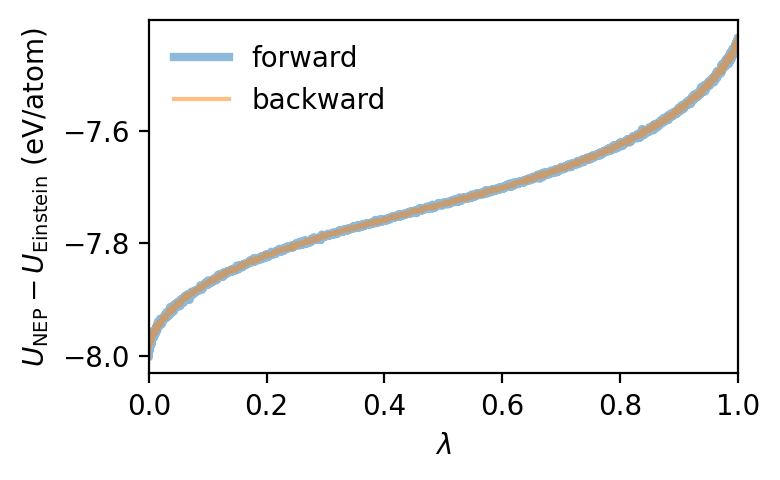

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4.0, 2.5), dpi=200)

ax.plot(df_fwd['lambda'], (df_fwd.pe - df_fwd.espring),
        '-', lw=3.0, alpha=0.5, label='forward')
ax.plot(df_bwd['lambda'], (df_bwd.pe - df_bwd.espring),
        '-', lw=1.5, alpha=0.5,  label='backward')

ax.set_ylabel('$U_\mathrm{NEP} - U_\mathrm{Einstein}$ (eV/atom)')
ax.set_xlabel('$\lambda$')
ax.set_xlim(0, 1)
ax.legend(frameon=False)

fig.tight_layout()

We can now obtain the free energy by integrating (or rather summing) over $\lambda$.
By averaging over the forward and backward switching runs the systematic error due to the finite switching rate cancels.

The free energy obtained in this fashion is also directly available from the `yaml` output file.
And indeed the `Free energy (average)` value agrees that we obtained by "manually" integrating the data from the `csv` file agrees with the value for `F` given in the `yaml` output file.

In [13]:
import yaml
from ase.units import _amu as amu, kB, _e as eV, _hbar as hbar

# work done by switching 
work_switch_fwd = np.sum(df_fwd.dlambda * (df_fwd.pe - df_fwd.espring))
work_switch_bwd = np.sum(df_bwd.dlambda * (df_bwd.espring - df_bwd.pe))
work_switch_ave = (work_switch_fwd + work_switch_bwd) / 2

# define harmonic reference system free energy
mass = atoms_ideal.get_masses()#[0]
omegas = np.sqrt(spring_k * eV / (mass * amu)) * 1e10  # in 1/s
F_oscillators = 3 * kB * T * np.log(hbar / eV * omegas / (kB * T))  # in eV
F_einstein = np.sum(F_oscillators) / n_atoms

# free energies for NEP model
F_fwd = work_switch_fwd + F_einstein
F_bwd = work_switch_bwd + F_einstein
F_avg = work_switch_ave + F_einstein

print(f'Free energy (forward)  : {F_fwd:12.7f} eV/atom')
print(f'Free energy (backward) : {F_bwd:12.7f} eV/atom')
print(f'Free energy (average)  : {F_avg:12.7f} eV/atom')
print('')

# compare to values in ti_spring.yaml
with open(f'{dirname}/ti_spring.yaml') as f:
    row = yaml.load(f, Loader=yaml.FullLoader)

for key, val in row.items():
    print(f'{key:22} : {val:12.7f}')

Free energy (forward)  :   -8.2076525 eV/atom
Free energy (backward) :   -8.2072549 eV/atom
Free energy (average)  :   -8.2074537 eV/atom

E_Einstein             :   -0.4847130
E_diff                 :   -7.7227420
F                      :   -8.2074550
T                      : 1000.0000000
V                      :   17.7965640
P                      :    0.0000000
G                      :   -8.2074550


### Temperature dependence

Next, we analyze the free energy as a function of temperature for both BCC and HCP phases by parsing the `yaml` files from a series of runs.

In [7]:
from glob import glob

dfs_spring = dict()
for phase in ['bcc', 'hcp']:
    records = []
    for fname in glob(f'my_freen_runs/switch_{phase}*/ti_spring.yaml'):
        with open(fname) as f:
            row = yaml.load(f, Loader=yaml.FullLoader)
        records.append(row)
    df = pd.DataFrame(records).sort_values('T', ignore_index=True)
    dfs_spring[phase] = df
    print(phase)
    display(df)

bcc


E_Einstein    E_diff         F       T          V    P         G
0    -0.274753 -7.738216 -8.012969   700.0  17.681046  0.0 -8.012969
1    -0.307756 -7.735010 -8.042766   750.0  17.698996  0.0 -8.042766
2    -0.341620 -7.731752 -8.073372   800.0  17.717466  0.0 -8.073372
3    -0.376293 -7.728475 -8.104768   850.0  17.736457  0.0 -8.104768
4    -0.411727 -7.725250 -8.136977   900.0  17.755969  0.0 -8.136977
5    -0.447880 -7.722060 -8.169939   950.0  17.776004  0.0 -8.169939
6    -0.484713 -7.718797 -8.203510  1000.0  17.796564  0.0 -8.203510
7    -0.522192 -7.715521 -8.237713  1050.0  17.817649  0.0 -8.237713
8    -0.560287 -7.712365 -8.272653  1100.0  17.839260  0.0 -8.272653
9    -0.598970 -7.709060 -8.308030  1150.0  17.861399  0.0 -8.308030
10   -0.638216 -7.705951 -8.344166  1200.0  17.884068  0.0 -8.344166
11   -0.678000 -7.702832 -8.380831  1250.0  17.907266  0.0 -8.380831
12   -0.718301 -7.699630 -8.417930  1300.0  17.930996  0.0 -8.417930
13   -0.759099 -7.696553 -8.455652  1350.0  17.955259  0.0 -8.455652
14   -0.800376 -7.693403 -8.493780  1400.0  17.980057  0.0 -8.493780

hcp


E_Einstein    E_diff         F       T          V    P         G
0    -0.274753 -7.751881 -8.026634   700.0  17.674366  0.0 -8.026634
1    -0.307756 -7.746786 -8.054542   750.0  17.697600  0.0 -8.054542
2    -0.341620 -7.741753 -8.083373   800.0  17.720854  0.0 -8.083373
3    -0.376293 -7.736778 -8.113071   850.0  17.744130  0.0 -8.113071
4    -0.411727 -7.731945 -8.143672   900.0  17.767427  0.0 -8.143672
5    -0.447880 -7.727120 -8.175000   950.0  17.790744  0.0 -8.175000
6    -0.484713 -7.722391 -8.207104  1000.0  17.814080  0.0 -8.207104
7    -0.522192 -7.717811 -8.240003  1050.0  17.837436  0.0 -8.240003
8    -0.560287 -7.713271 -8.273558  1100.0  17.860809  0.0 -8.273558
9    -0.598970 -7.708817 -8.307787  1150.0  17.884201  0.0 -8.307787
10   -0.638216 -7.704417 -8.342633  1200.0  17.907609  0.0 -8.342633
11   -0.678000 -7.700044 -8.378044  1250.0  17.931033  0.0 -8.378044
12   -0.718301 -7.695847 -8.414148  1300.0  17.954472  0.0 -8.414148
13   -0.759099 -7.691721 -8.450821  1350.0  17.977925  0.0 -8.450821
14   -0.800376 -7.687757 -8.488134  1400.0  18.001392  0.0 -8.488134

We can now plot the free energy as a function of temperature which shows that at some temperature between 1000 and 1300 K the BCC phase becomes more stable than the HCP phase.
Due to the very similar slopes it is, however, difficult to locate the exact transition temperature.
To obtain a clearer picture it is therefore preferable to consider the free energy *difference* $\Delta F$ between the two phases, which is shown in the bottom panel.
This yields a transition temperature of about 1140 K, in good agreement with the experimentally reported value of 1155 K.

This analysis incidentally also highlights the biggest challenge in free energy calculations, namely that one the free energy differences must be very well converged in order to control the error in the transition temperature.
To obtain accuracte results it is therefore a good idea to run multiple identical independent simulatons, and average the thus obtained free energies to reduce the error.
This also allows one provide a standard error estimate for the free energy by computing the standard deviation of all obtained free energies.

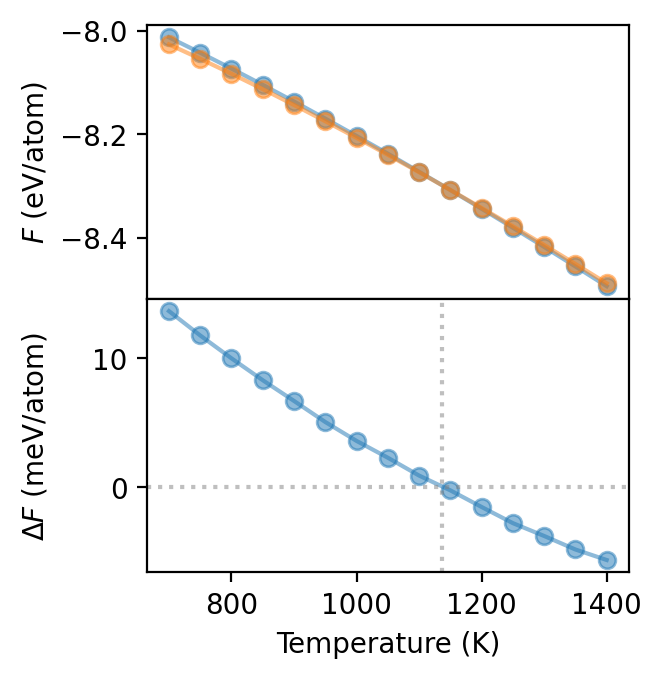

In [8]:
fig, axes = plt.subplots(figsize=(3.4, 3.5), dpi=200, nrows=2, sharex=True)

for phase in ['bcc', 'hcp']:
    axes[0].plot(dfs_spring[phase]['T'], dfs_spring[phase].F,
                 '-o', label=phase, alpha=0.5)

ax = axes[1]
ax.plot(dfs_spring['bcc']['T'], 1e3 * (dfs_spring['bcc'].F - dfs_spring['hcp'].F),
        '-o', alpha=0.5)
ax.axvline(1136, color='0.5', alpha=0.5, ls=':')
ax.axhline(0, color='0.5', alpha=0.5, ls=':')

axes[0].set_ylabel('$F$ (eV/atom)')
axes[1].set_ylabel('$\Delta F$ (meV/atom)')
axes[-1].set_xlabel('Temperature (K)')

fig.tight_layout()
fig.align_ylabels()
fig.subplots_adjust(hspace=0)

## Reversible scaling approach

We now also consider the reversible scaling (RS) approach.
In the following cell we set up the input files for two runs, one for BCC and one for HCP.

In [9]:
initial_temperature, final_temperature = 700, 1500
n_switch = 40000
n_equil = 1000

for phase in ['bcc', 'hcp']:
    # set up structure
    if phase == 'bcc':
        alat = get_Ti_bcc_lattice_parameter(initial_temperature)
        prim = bulk('Ti', crystalstructure='bcc', a=alat, cubic=True)
        size = 20
    elif phase == 'hcp':
        alat, clat = get_Ti_hcp_lattice_parameter(initial_temperature)
        prim = bulk('Ti', crystalstructure='hcp', a=alat, c=clat, orthorhombic=True)
        size = [20, 12, 13]
    supercell = prim.repeat(size)

    # set up directory
    dirname = f'my_freen_runs/rs_{phase}_Ti{initial_temperature}' \
              f'_Ti{final_temperature}_nat{len(supercell)}_nswitch{n_switch}'
    os.makedirs(dirname, exist_ok=True)
    
    # write model.xyz
    write_xyz(os.path.join(dirname, 'model.xyz'), supercell)

    # write run.in
    with open(os.path.join(dirname, 'run.in'), 'w') as f:
        f.write(f'potential     {os.path.abspath(potential_fname)}\n')
        # write equilibration
        f.write(f'velocity      {initial_temperature}\n')
        f.write(f'ensemble      nvt_lan {initial_temperature} {initial_temperature} {T_damp}\n')
        f.write(f'time_step     {dt}\n')
        f.write(f'run           {n_eq}\n\n\n')
    
        # write production
        f.write(f'ensemble      ti_rs temp {initial_temperature} {final_temperature}'
                f' aniso 0 tswitch {n_switch} tequil {n_equil}\n')
        f.write(f'time_step     {dt}\n')
        f.write(f'dump_thermo   {thermo_interval}\n')
        f.write(f'run           {2 * n_switch + n_equil}\n')

After the two runs have finished we can analyze the results.
As apparent from the expression for the total free energy in the RS approach (see above), we need both the variation of the energy (or enthalpy) throughout the simulation and the *total* free energy at the reference (initial) temperature.
Here, the latter is taken from the Frenkel-Ladd approach.

For convenience we define a function that carries out all the data manipulation.

In [10]:
from scipy.integrate import cumulative_trapezoid

def get_free_energy(
    reference_freen_yaml: str,
    reversible_switching_csv: str,
):
    """
    Parameters
    ----------
    reference_freen_yaml
        Path to ti_spring.yaml file with the free energy
        at the reference (initial) temperature.
    reversible_switching_csv
        Path to ti_rs.csv file with the data from the
        reversible scaling run.
    """

    # One requires the total free energy at the initial temperature.
    # Here it is assumed to come from a calculation using the ti_spring command.
    with open(reference_freen_yaml, 'r') as f:
        y =  yaml.safe_load(f)
    reference_temperature = y['T']
    reference_freen = y['G']

    # Read data from reversible scaling (RS) run and split it into forward and backward sequences.
    rs = pd.read_csv(reversible_switching_csv)
    n = int(len(rs)/2)
    forward = rs[:n]
    backward = rs[n:][::-1].reset_index()

    # Compute the irreversible work done along the lambda-path.
    lmb = forward['lambda']
    work_fwd = cumulative_trapezoid(forward['enthalpy'], lmb, initial=0)
    work_bwd = cumulative_trapezoid(backward['enthalpy'], lmb, initial=0)
    work = (work_fwd + work_bwd) / 2

    # Compute the free energy.
    freen = (reference_freen + 3 / 2 * kB * reference_temperature * np.log(lmb) + work) / lmb
    temperature = reference_temperature / lmb

    df = pd.DataFrame(np.transpose([temperature, freen]), columns=['temperature', 'free_energy'])
    return df

Now we can plot the results, which shows that the results from RS approach are in very good agreement with the Frenkel-Ladd results.
The RS approach requires far fewer simulations and thus is often preferable.
It does, however, require a reference free energy, which needs to be very accurate in order to obtain reliable results.
In practice it can therefore often be beneficial to add reference calculations (using Frenkel-Ladd) also at some higher temperature(s) in order to check the convergence of the results.

In [11]:
dfs_rs = dict()
dfs_rs['bcc'] = get_free_energy(
    'my_freen_runs/switch_bcc_T700_nat16000_nsample100000_spring2.000000/ti_spring.yaml',
    'my_freen_runs/rs_bcc_Ti700_Ti1500_nat16000_nswitch40000/ti_rs.csv')
dfs_rs['hcp'] = get_free_energy(
    'my_freen_runs/switch_hcp_T700_nat12480_nsample100000_spring2.000000/ti_spring.yaml',
    'my_freen_runs/rs_hcp_Ti700_Ti1500_nat12480_nswitch40000/ti_rs.csv')

fig, axes = plt.subplots(figsize=(3.4, 3.5), dpi=200, nrows=2, sharex=True)

for phase in ['bcc', 'hcp']:
    ax = axes[0]
    kwargs = dict(
        color = 'C0' if phase == 'hcp' else 'C1',
        alpha=0.5
    )
    ax.plot(dfs_spring[phase]['T'], dfs_spring[phase].F, 'o', label=phase.upper(), **kwargs)
    ax.plot(dfs_rs[phase].temperature, dfs_rs[phase].free_energy, **kwargs)
axes[0].legend(frameon=False, handlelength=1)

ax = axes[1]
kwargs = dict(color = '0.5', alpha=0.5)
ax.plot(dfs_spring['bcc']['T'], 1e3 * (dfs_spring['bcc'].F - dfs_spring['hcp'].F),
        'o', label='Frenkel-Ladd', **kwargs)
ax.plot(dfs_rs['bcc'].temperature,
        1e3 * (dfs_rs['bcc'].free_energy - dfs_rs['hcp'].free_energy),
        label='reversible scaling', **kwargs)
ax.axvline(1136, ymax=0.6, color='0.5', alpha=0.5, ls=':')
ax.axhline(0, color='0.5', alpha=0.5, ls=':')

axes[0].set_ylabel('$F$ (eV/atom)')
axes[1].set_ylabel('$\Delta F$ (meV/atom)')
axes[-1].set_xlabel('Temperature (K)')
axes[-1].legend(frameon=False, handlelength=1)

fig.tight_layout()
fig.align_ylabels()
fig.subplots_adjust(hspace=0)